In [1]:
# Imports
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation
import seaborn as sns
import pandas as pd

from IPython.display import HTML

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "../data/"

In [5]:
gapminder = pd.read_csv(path + "gapminder.csv")

In [6]:
gm2002 = gapminder.loc[gapminder['year']==2002,]

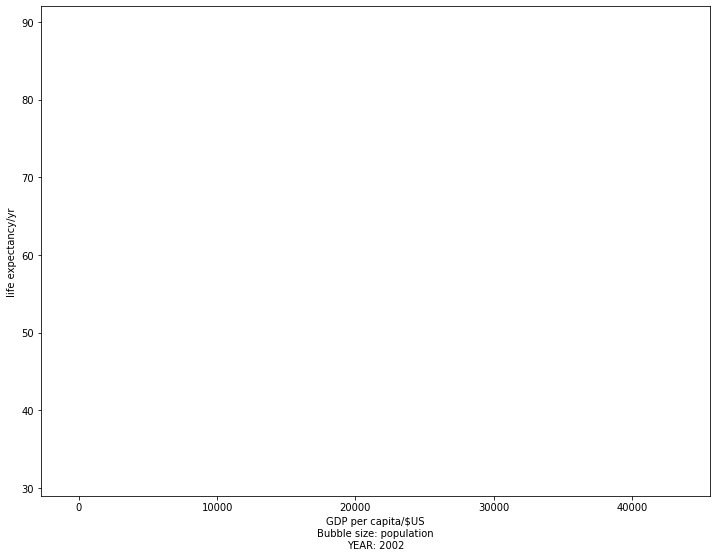

In [7]:
fig2002 = plt.figure(figsize=(12, 9))
ax2002 = fig2002.add_subplot(1, 1, 1)
ax2002.set_xlim(np.floor(gm2002['gdpPercap'].min()) - 3000,
                np.floor(gm2002['gdpPercap'].max()) + 1000)
ax2002.set_ylim(np.floor(gm2002['lifeExp'].min()) - 10,
                np.floor(gm2002['lifeExp'].max()) + 10)
ax2002.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: 2002')
ax2002.set_ylabel('life expectancy/yr')
continents = np.unique(gm2002['continent'])
cmap = dict(zip(continents, sns.color_palette()))
colors = [cmap[con] for con in gm2002['continent']]
sizes = gm2002['pop'] * 1e-5

In [9]:
for continent in continents:
    data = gm2002.loc[gm2002['continent'] == continent,]
    sizes = data['pop'] * 1e-5
    ax2002.scatter(data['gdpPercap'], data['lifeExp'],
                   s=sizes,
                   alpha=0.5,
                   c=cmap[continent])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

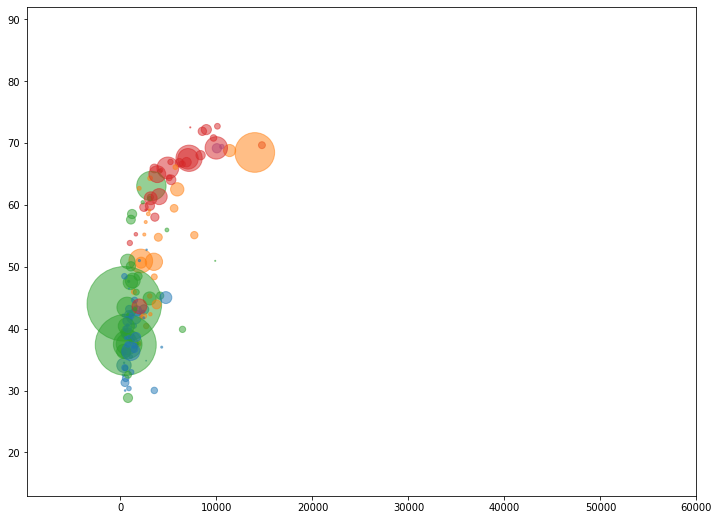

In [12]:
figgdp = plt.figure(figsize=(12, 9))
axgdp = figgdp.add_subplot(1, 1, 1)

axgdp.set_xlim(np.floor(gapminder['gdpPercap'].min()) - 10000,
               60000)
axgdp.set_ylim(np.floor(gapminder['lifeExp'].min()) - 10,
               np.floor(gapminder['lifeExp'].max()) + 10)

ax2002.set_xlabel('GDP per capita/$US\nBubble size: population')
ax2002.set_ylabel('life expectancy/yr')

data = gapminder.loc[gapminder['year'] == 1952,]
sizes = data['pop'] * 1e-5
colors = [cmap[con] for con in data['continent']]
sctr = axgdp.scatter(data['gdpPercap'], data['lifeExp'], s=sizes, c=colors, alpha=0.5)

In [15]:
def init_gdp():
    sctr.set_offsets([])
    return(sctr,)

year =np.unique(gapminder['year'])[frame_number]
data = gapminder.loc[gapminder['year'] == year,]
plotdata = transpose(asarray((data['gdpPercap'], data['lifeExp'])))
scat.set_offsets(plotdata)
scat.set_sizes(data['pop'] * 1e-5)
axgdp.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: {0}'.format(year))

In [16]:
def update_gdp(frame_number):
    # Get year and data to be rendered
    year = np.unique(gapminder['year'])[frame_number]
    data = gapminder.loc[gapminder['year'] == year,]

    # Update scatterplot location data
    plotdata = np.transpose(np.asarray((data['gdpPercap'], data['lifeExp'])))
    sctr.set_offsets(plotdata)

    # Update scatterplot sizes and axis label
    sctr.set_sizes(data['pop'] * 1e-5)
    axgdp.set_xlabel('GDP per capita/$US\nBubble size: population\nYEAR: {0}'.format(year))

    return(sctr,)

In [17]:
anim_gdp=animation.FuncAnimation(figgdp, update_gdp, init_func=init_gdp, frames=12, interval=500)
HTML(anim_gdp.to_html5_video())